# 0. Setup Paths

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=be22452cbe8dcdba2a4ba164cc992c7bacfb20694fe36d1db2bdfa81739008de
  Stored in directory: C:\Users\prani\AppData\Local\Temp\pip-ephem-wheel-cache-8x_6zbvv\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [8]:
import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
#protoc -> protocol buffer that the object detection model relies on
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
#code to install object detection api
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e . 

 84% [..............................................................            ] 1245184 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-39: module references __file__
listing git files failed - pretending there aren't any
zip_safe flag not set; analyzing archive contents...
zip_safe flag not set; analyzing archive contents...
cpuinfo.__pycache__.cpuinfo.cpython-39: module references __file__
cpuinfo.__pycache__.cpuinfo.cpython-39: module MAY be using inspect.stack
cpuinfo.__pycache__.cpuinfo.cpython-39: module MAY be using inspect.trace
P:\Anaconda\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the und

copying build\lib\nets\nasnet\__init__.py -> build\bdist.win-amd64\egg\nets\nasnet
copying build\lib\nets\nets_factory.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\nets_factory_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\overfeat.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\overfeat_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\pix2pix.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\pix2pix_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\post_training_quantization.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\resnet_utils.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\resnet_v1.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\resnet_v1_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\resnet_v2.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\resnet_v2_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\s3dg.py -

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///P:/IoT/Tensorflow/models/research/slim
  Running setup.py develop for slim


In [11]:
#!pip list

In [12]:
!pip install pyparsing==2.4.7
!pip install --upgrade witwidget -q

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.4
    Uninstalling pyparsing-3.0.4:
      Successfully uninstalled pyparsing-3.0.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0 which is incompatible.


In [13]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-05-12 12:40:00.345065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2022-05-12 12:40:00.345403: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.9.7: P:\Anaconda\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-05-12 12:40:00.367825: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with th

I0512 12:40:21.807491 12796 efficientnet_model.py:144] round_filter input=1280 output=2560
I0512 12:40:21.856489 12796 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=2.0, depth_coefficient=3.1, resolution=600, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='dep

In [13]:
#!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 --upgrade 

In [15]:
# !pip install matplotlib Pillow pyyaml object_detection

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=e355550ae2a4c35414bbf7befff4588c8c2fab90d4629d8d3d2e1cb137a74471
  Stored in directory: C:\Users\prani\AppData\Local\Temp\pip-ephem-wheel-cache-02thablz\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [18]:
# !pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=0b3e48f642664ee2605bc8b2d2cad4778cb016179c3538b206c55827aa2e5f98
  Stored in directory: C:\Users\prani\AppData\Local\Temp\pip-ephem-wheel-cache-827x8pea\wheels\38\6f\73\3c0c70f9a8219c31c96c495b686af1416154b60707fd96a4cd
Successfully built tensorflow-object-detection-api
  Attempting uninstall: pkginfo
    Found existing installation: pkginfo 1.7.1
    Uninstalling pkginfo-1.7.1:
      Successfully uninstalled pkginfo-1.7.1


In [19]:
import object_detection

In [20]:
#download the pretrained model for transfer learning 
#transfer learning means to reuse a predeveloped model and make changes to it depending on our needs

wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [21]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [22]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [24]:
# !pip install pytz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [25]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "P:\IoT\Tensorflow\scripts\generate_tfrecord.py", line 62, in <module>
    label_map_dict = label_map_util.get_label_map_dict(label_map)
  File "P:\Anaconda\lib\site-packages\object_detection\utils\label_map_util.py", line 164, in get_label_map_dict
    label_map = load_labelmap(label_map_path)
  File "P:\Anaconda\lib\site-packages\object_detection\utils\label_map_util.py", line 133, in load_labelmap
    label_map_string = fid.read()
  File "P:\Anaconda\lib\site-packages\tensorflow\python\lib\io\file_io.py", line 114, in read
    self._preread_check()
  File "P:\Anaconda\lib\site-packages\tensorflow\python\lib\io\file_io.py", line 76, in _preread_check
    self._read_buf = _pywrap_file_io.BufferedInputStream(
TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. tensorflow.python.lib.io._pywrap_file_io.BufferedInputStream(filename: str, buffer_size: int, token: tensorflow.python.lib.io._py

# 4. Copy Model Config to Training Folder

In [24]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [9]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [10]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
    

In [28]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [29]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [30]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [13]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [14]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [15]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [34]:
# #we ran the above command in command prompt inorder to keep track of it's progress
# !{command}

# 7. Load Train Model From Checkpoint

In [13]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util 

In [43]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 8. Detect from an Image

In [40]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [45]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'],'test', 'Cars425.png')

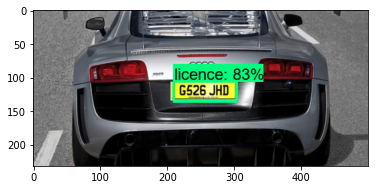

In [46]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [64]:
detections

{'detection_boxes': array([[6.13221824e-01, 4.22430068e-01, 7.24281490e-01, 7.05361485e-01],
        [5.67829311e-01, 4.03186411e-01, 7.46298850e-01, 7.10006714e-01],
        [4.28425968e-01, 1.88340575e-01, 6.17535532e-01, 7.74453044e-01],
        [6.31434560e-01, 4.15514439e-01, 7.52268791e-01, 6.57920957e-01],
        [6.43886864e-01, 4.55394268e-01, 7.23280966e-01, 6.65359139e-01],
        [5.87123930e-01, 4.51563895e-01, 7.39761770e-01, 6.24202907e-01],
        [1.40598670e-01, 4.34787944e-02, 2.08110973e-01, 2.09854662e-01],
        [5.82436919e-01, 4.31147933e-01, 7.02298403e-01, 7.32128859e-01],
        [5.25754452e-01, 4.31864321e-01, 7.18796015e-01, 8.00525606e-01],
        [4.90192592e-01, 3.76094639e-01, 6.95088446e-01, 7.42976248e-01],
        [9.74038482e-01, 3.95634145e-01, 1.00000000e+00, 6.19736850e-01],
        [5.34969330e-01, 4.37268317e-01, 7.97280550e-01, 6.90074384e-01],
        [1.16452351e-02, 0.00000000e+00, 1.23014174e-01, 1.87223613e-01],
        [6.28962517

In [22]:
detections.keys() 

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# Apply OCR to Detection

In [44]:
#!pip install easyocr --user

In [45]:
#!pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113

In [46]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [17]:
import easyocr
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

C:\Users\prani\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [18]:
detection_threshold = 0.5

In [19]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [20]:
width = image.shape[1]
height = image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.56524885 0.36464155 0.6860421  0.6403215 ]
[127.18099058 145.85661888 154.35946584 256.12859726]
[([[4, 0], [106, 0], [106, 27], [4, 27]], 'DZI7 YXR', 0.8476270321759378)]


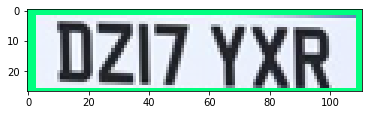

In [21]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [88]:
ocr_result

[([[4, 0], [106, 0], [106, 27], [4, 27]], 'DZI7 YXR', 0.8476270321759378)]

In [89]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

27
DZI7 YXR


# OCR Filtering

In [22]:
region_threshold = 0.05

In [23]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [95]:
filter_text(region, ocr_result, region_threshold)

['DZI7 YXR']

# Bring it Together

In [24]:
region_threshold = 0.6

In [25]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


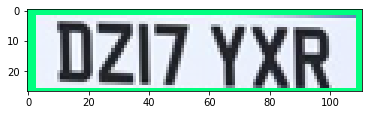

['DZI7 YXR']


In [100]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Save Results

In [26]:
import csv
import uuid

In [27]:
'{}.jpg'.format(uuid.uuid1())

'3aeab696-c72d-11ec-af69-00d861087345.jpg'

In [28]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [63]:
region

array([[[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 95, 136, 141],
        [127, 255,   0],
        [127, 255,   0]],

       ...,

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 56, 146, 159],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [ 62, 147, 157],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]]

In [64]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Detection using a recorded video

In [65]:
#!pip uninstall opencv-python-headless -y

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


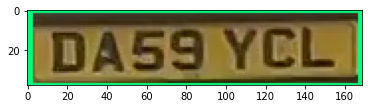

['dAsgycL']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


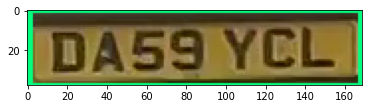

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['dAsgycL']


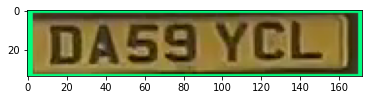

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DAsgyCL']


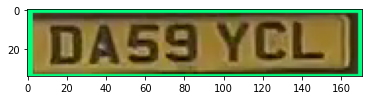

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DAsgyCL']


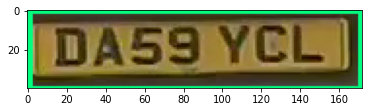

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DAs9YCL']


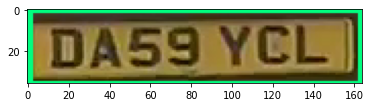

['DA5gYCL']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


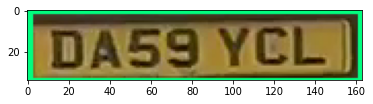

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DAS9YCL']


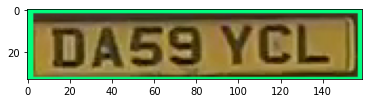

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DA59YCL']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


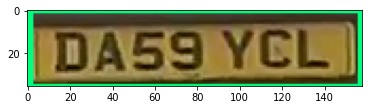

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DA5gYCL']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


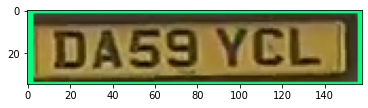

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DAs59YCL']


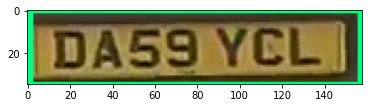

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DAs9YCL']


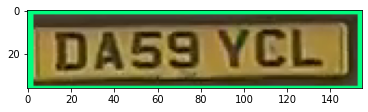

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DA59YCL']


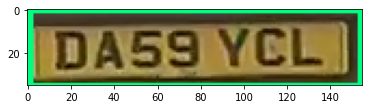

['DA59YCL']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


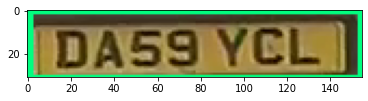

['DAs9YCL']


In [66]:
cap = cv2.VideoCapture('video.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    
    image_np = np.array(frame)
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()    


    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.7,
                agnostic_mode=False)

    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        if len(text)>0:
            save_results(text, region, 'videoresults.csv', 'Detection_Images')
    except:
        pass
    
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(2) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 11. Real Time Detections from your Webcam

In [29]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
font = cv2.FONT_HERSHEY_TRIPLEX

fr=0
fy=0
fg=1

while cap.isOpened(): 
    
    ret, frame = cap.read()
    
    if fr==1: #red light    
        cv2.putText(frame, 'RED LIGHT', (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)
        
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                        for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()    


        viz_utils.visualize_boxes_and_labels_on_image_array(
                    image_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes']+label_id_offset,
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    min_score_thresh=.7,
                    agnostic_mode=False)

        try: 
            text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
            if len(text[0])>0:
                save_results(text, region, 'videoresults.csv', 'Detection_Images')
        except:
            pass

        if cv2.waitKey(2) & 0xFF == ord('g'):
            fg=1
            fr=0
            fy=0
        if cv2.waitKey(2) & 0xFF == ord('y'):
            fg=0
            fr=0
            fy=1
        
    if fy==1: #yellow light
        cv2.putText(frame, 'YELLOW LIGHT', (50, 50), font, 1, (0, 255, 255), 2, cv2.LINE_4)
        if cv2.waitKey(2) & 0xFF == ord('g'):
            fg=1
            fr=0
            fy=0
        if cv2.waitKey(2) & 0xFF == ord('r'):
            fg=0
            fr=1
            fy=0
        
    if fg==1: #green light
        cv2.putText(frame, 'GREEN LIGHT', (50, 50), font, 1, (0,128,0), 2, cv2.LINE_4)
        if cv2.waitKey(2) & 0xFF == ord('y'):
            fg=0
            fr=0
            fy=1
        if cv2.waitKey(2) & 0xFF == ord('r'):
            fg=0
            fr=1
            fy=0
            
    image_np = np.array(frame)
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    image_np_with_detections = image_np.copy()  
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))   

    if cv2.waitKey(2) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [30]:
cap.release()
cv2.destroyAllWindows()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


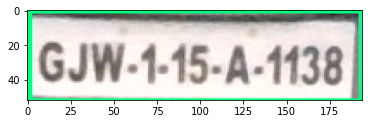

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['GJW-115-A.1138']


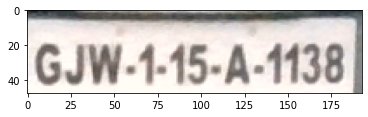

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['GJw-1.15-4-1138']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


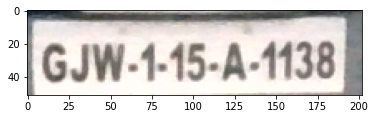

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['GJW-1.15-4.1138]']


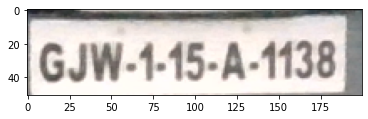

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['GJW-1.15-4-1138']


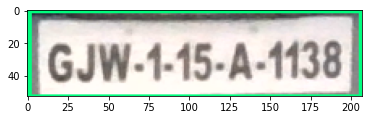

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['GJW-1.15-4-1138']


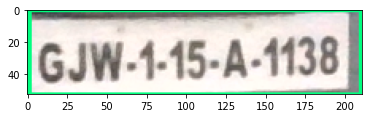

['GJW-+.15-A.1138']


In [33]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
font = cv2.FONT_HERSHEY_TRIPLEX

while cap.isOpened(): 
    ret, frame = cap.read()
    cv2.putText(frame, 'RED LIGHT', (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break